# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Importing Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import random
from citipy import citipy
from config import api_key

## Generate Cities List

In [3]:
#Empty lists for later use
coordinates = []
cities = []

#lat & lng ranges
lat_range=(-90, 90)
lng_range=(-180,180)

#random city selection
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
coordinates = zip(lats, lngs)

#nearest city id for random selection
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #add to list if unique name
    if city not in cities:
        cities.append(city)

len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Building API call
weather = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = weather + "appid=" + api_key + "&units=" + units + "&q="

In [5]:
#Step to determine the json output of the query
json_format = requests.get(f'{query_url}chicago').json()
json_format

{'coord': {'lon': -87.65, 'lat': 41.85},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 38.62,
  'feels_like': 36.81,
  'temp_min': 36.41,
  'temp_max': 40.17,
  'pressure': 1016,
  'humidity': 67},
 'visibility': 10000,
 'wind': {'speed': 3, 'deg': 299, 'gust': 11.99},
 'clouds': {'all': 90},
 'dt': 1636828201,
 'sys': {'type': 2,
  'id': 2005153,
  'country': 'US',
  'sunrise': 1636807088,
  'sunset': 1636842715},
 'timezone': -21600,
 'id': 4887398,
 'name': 'Chicago',
 'cod': 200}

In [13]:
#empty lists for df 
more_cities = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind = []
country = []
date = []

#setting count to 0 so each city will display a number as the loop executes
counter = 0 

for city in cities:
    
    query = requests.get(f'{query_url}{city}').json()
    
    try:
        
        lat.append(query['coord']['lat'])
        lng.append(query['coord']['lon'])
        max_temp.append(query['main']['temp_max'])
        humidity.append(query['main']['humidity'])
        cloudiness.append(query['clouds']['all'])
        wind.append(query['wind']['speed'])
        country.append(query['sys']['country'])
        date.append(query['dt'])
        more_cities.append(city)
        
        counter += 1
        
        print(f'Accessing {city}. Record {counter}.')
        
    except:
        print(f'No data available for {city}.')
        pass

Accessing bredasdorp. Record 1.
Accessing saint-philippe. Record 2.
Accessing ushuaia. Record 3.
Accessing tongliao. Record 4.
Accessing albany. Record 5.
Accessing ekibastuz. Record 6.
Accessing kaffrine. Record 7.
Accessing busselton. Record 8.
Accessing tateyama. Record 9.
Accessing new norfolk. Record 10.
Accessing narsaq. Record 11.
Accessing kaitangata. Record 12.
Accessing tuktoyaktuk. Record 13.
Accessing marawi. Record 14.
Accessing port blair. Record 15.
Accessing rikitea. Record 16.
Accessing mar del plata. Record 17.
Accessing dikson. Record 18.
Accessing karla. Record 19.
Accessing qaanaaq. Record 20.
No data available for taolanaro.
Accessing aripuana. Record 21.
Accessing lazaro cardenas. Record 22.
Accessing havre-saint-pierre. Record 23.
No data available for sentyabrskiy.
Accessing safford. Record 24.
Accessing mataura. Record 25.
No data available for illoqqortoormiut.
Accessing chokurdakh. Record 26.
Accessing arraial do cabo. Record 27.
Accessing corumba. Record 28

Accessing menomonee falls. Record 232.
No data available for maghama.
Accessing nassau. Record 233.
No data available for wanderlandia.
Accessing curup. Record 234.
Accessing saint-francois. Record 235.
Accessing wiarton. Record 236.
Accessing numaligarh. Record 237.
Accessing saint-michel-des-saints. Record 238.
Accessing bull savanna. Record 239.
Accessing seoul. Record 240.
Accessing port-gentil. Record 241.
Accessing baiyin. Record 242.
No data available for karaul.
Accessing indianola. Record 243.
Accessing tessalit. Record 244.
Accessing sioux lookout. Record 245.
Accessing nicolas romero. Record 246.
Accessing caravelas. Record 247.
Accessing rocha. Record 248.
Accessing faanui. Record 249.
Accessing flin flon. Record 250.
No data available for rungata.
Accessing fairbanks. Record 251.
Accessing mazsalaca. Record 252.
No data available for khormuj.
Accessing nieves. Record 253.
Accessing iqaluit. Record 254.
Accessing saldanha. Record 255.
Accessing timmins. Record 256.
No data 

Accessing vestmannaeyjar. Record 462.
Accessing isangel. Record 463.
Accessing sar-e pul. Record 464.
Accessing presidencia roque saenz pena. Record 465.
Accessing axim. Record 466.
Accessing monte san giovanni campano. Record 467.
Accessing gravdal. Record 468.
Accessing arlit. Record 469.
Accessing constitucion. Record 470.
Accessing igarka. Record 471.
Accessing san rafael. Record 472.
Accessing gaozhou. Record 473.
Accessing cayenne. Record 474.
Accessing aban. Record 475.
Accessing ust-kuyga. Record 476.
Accessing marienburg. Record 477.
Accessing tambura. Record 478.
Accessing husavik. Record 479.
Accessing puri. Record 480.
Accessing vanavara. Record 481.
Accessing bosorod. Record 482.
Accessing smolenka. Record 483.
Accessing sesheke. Record 484.
Accessing villarrica. Record 485.
Accessing clarksville. Record 486.
Accessing baglan. Record 487.
Accessing bilecik. Record 488.
Accessing merauke. Record 489.
Accessing selma. Record 490.
Accessing high level. Record 491.
Accessing y

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
city_df = pd.DataFrame({'City':more_cities,
                       'Lat':lat,
                       'Lng':lng,
                       'Max Temp':max_temp,
                       'Humidity':humidity,
                       'Cloudiness':cloudiness,
                       'Wind Speed':wind,
                       'Country':country,
                       'Date':date})

csv = "weather_csv.csv"
city_df.to_csv(csv, encoding="utf-8", index=False)

city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,59.29,83,23,5.77,ZA,1636830098
1,saint-philippe,-21.3585,55.7679,76.55,82,100,12.26,RE,1636830098
2,ushuaia,-54.8000,-68.3000,59.61,36,100,8.59,AR,1636830098
3,tongliao,43.6125,122.2653,30.99,71,14,6.17,CN,1636830099
4,albany,42.6001,-73.9662,56.75,88,92,4.00,US,1636829831


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
city_df['Humidity'].value_counts().nlargest()

90    17
78    17
93    16
83    14
74    14
Name: Humidity, dtype: int64

### No cities have humidity over 100%. Skipping remaining steps relating to humidity.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

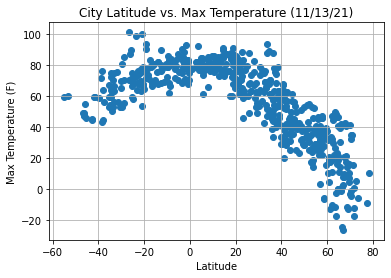

In [22]:
x = city_df['Lat']
y = city_df['Max Temp']

fig = plt.scatter(x, y)
plt.title('City Latitude vs. Max Temperature (11/13/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('lat_v_temp.png')

This scatter plot displays the relationship between latitude and temperature. As expected, close to the equator (0), temperature is highest, then drops of the further north or south you reference.

## Latitude vs. Humidity Plot

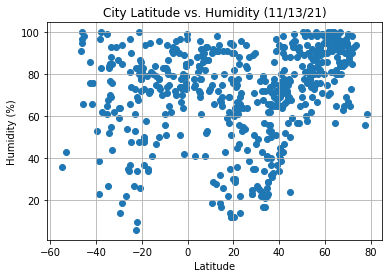

In [23]:
x = city_df['Lat']
y = city_df['Humidity']

fig = plt.scatter(x, y)
plt.title('City Latitude vs. Humidity (11/13/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('lat_v_humidity.png')

In this scatter, % humidity and latitude are compared. 

## Latitude vs. Cloudiness Plot

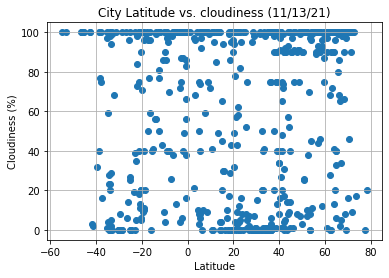

In [24]:
x = city_df['Lat']
y = city_df['Cloudiness']

fig = plt.scatter(x, y)
plt.title('City Latitude vs. cloudiness (11/13/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('lat_v_cloudiness.png')

% cloudiness and latitude are compared in this scatter plot. 

## Latitude vs. Wind Speed Plot

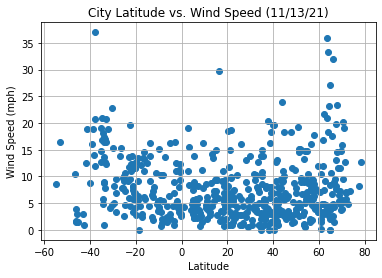

In [25]:
x = city_df['Lat']
y = city_df['Wind Speed']

fig = plt.scatter(x, y)
plt.title('City Latitude vs. Wind Speed (11/13/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('lat_v_wind_speed.png')

Wind speed and latitude are compared in this scatter plot.

## Linear Regression

In [27]:
northern_hem = city_df.loc[city_df['Lat']>=0]
southern_hem = city_df.loc[city_df['Lat']< 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


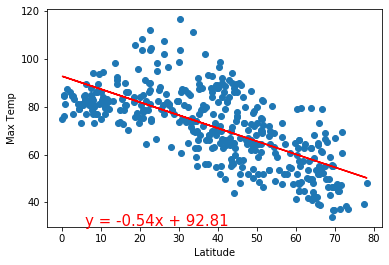

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


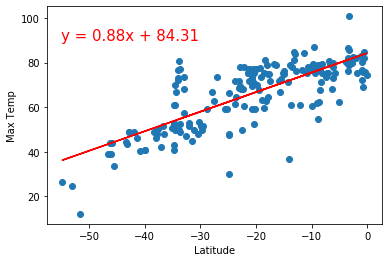

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


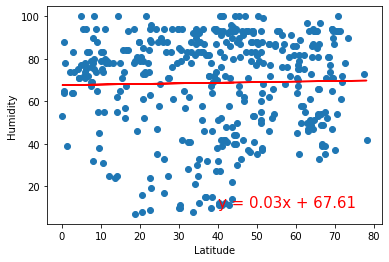

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


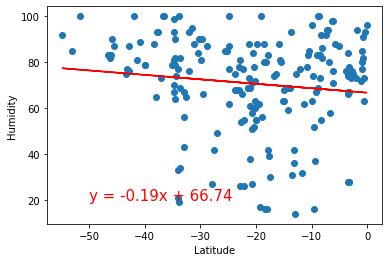

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


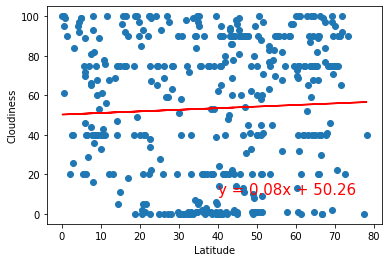

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


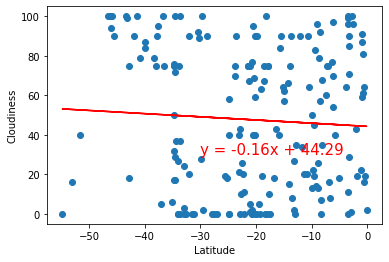

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


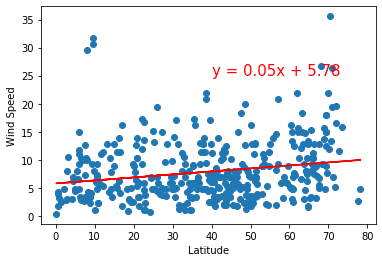

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


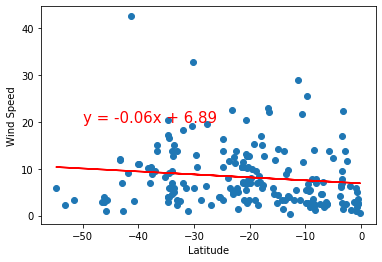